# WeatherPy (Alternate Version)

### Author:  Jose Tomines
### Date:  2018-12-09

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This is due to the tilt of the earth that is the determiner of seasons experienced by the earth.
* Highest temperatures are seen between -20 Deg. to -10 Deg. Latitude.
* Temperatures drop below 0 Deg. Celsius north of 30 Deg. Latitude, with the lowest temperatures (below -40 Deg. Celsius) occuring between 50 Deg. and 70 Deg. Latitude.
* There is no strong relationship between latitude & humidity.  Almost all cities show humidity above 20% with the majority of cities in the 70-100% humidity range.  Is this because people prefer NOT to build cities in very dry locations?
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0%, 20%, and a few at 75% cloudiness.  Is this due to the tendancy to round % cloudiness to the nearest 5%?
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a few cities aboe 10 m/sec, usually above 20 Deg. Latitude.
* See additional trends discussed in the Bonus Plots subsection below:

### Notes
* The reason I created this Alternate version is because it bothered me that in the original sequence of actions outlined in the starter code, we had to generate an arbitrary number of unique cities larger than our 500 minumum requirement, and then take that list of cities and use the API to get the weather for those cities.  As was evident in the log, the problem was some of those cities originally generated, were not found in the Weather API.  If we didn't originally select a large enough number  to generate, there is a possibility that we may not get 500 cities with weather data, and would have to run this program again
* In this version, we locate the nearest city from the random coordinates we generated, and then check if that city has weather data in the Weather API, before storing all the required data in a list.  This way we can grab exactly 500 cities in one go, without setting up an arbitrary number of loops.
* Even though each city was determined by randomly geographic coordinates, the coordinates actually used in the graphs were those stored for that city in the Weather API.  The reason is that even though the CitiPy determined the closest city to those random coordinates, the city may in actuality be many degrees off in latitude from the generated coordinates...  especially if the coordinates point to the middle of an ocean
* API requests specifically asked for metric measurements
* To avoid violating the 60 requests per minute rule in using the Weather API, I've added a 1 second delay after each API request.
* This script also stores the processing log with the datestamp within the filename.
* All output files for this Alternate Version will include "Alt" in the filename

### Bonus Plots
The Weather API provides data on sunrise time and sunset time.  Because of this, I decided to add some additionals plots to view how latitude influences the sunrise and sunset times of the cities. The following winter seasonal trends were observed very clearly:
* As the northern latitude increases, the Sunrise time occurs more later in the day
* As the northern latitude increases, the Sunset time occurs more earlier in the day
* Correspondingly, the overall duration of sunlight decreases the further north you go
This is the nature of the earth's tilt and it's effect to sunlight received, and hence colder temperatures during the winter season.

The final plot shows the geographic coordinates of all the cities used.  In the original JTomines_WeatherPy file, you can clearly see the edges of all the continents.  This is because of the fact that oceans cover 70% of the earth surface, and since we are randomly generating coordinates, and then finding the nearest city to those coordinates, you have predominantly more cities that are on the edges of the land masses.  This isn't as apparent in this file because there was exactly 500 cities selected, as opposed to more than 800 cities selected in the original file.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time as tm
from datetime import date
from datetime import time
from datetime import datetime as dt
from pprint import pprint

# Declare API key
api_key = "1c9e087c0c96b654d94b3f5c8b571e81"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Output File (CSV)
output_data_file = 'output/city_weather_alt.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Randomly Generate 500 Unique Cities and Perform API Calls for Weather Data
Each loop will:
* Randomly generate Geo Coordinates
* Use CitiPy to find nearest city name and country code
* Ensure city name was not already generated previously
* Make API call to Weather API using city name and country code
* Ensure that the city was found in the API response and has weather data
* Store weather data in lists to be combined later in data frame
* Create log regarding all data retrieval

Looping will end after 500 unique cities and their weather data has been retrieved


In [2]:
# Initialize variables to capture the weather API data.
itemNum = 1
orig_city = []     # Note that I also kept the original city and country code that was retrieved by citipy
dte = []
cty = []
con = []
lon = []
lat = []
tmp = []
hum = []
cld = []
wnd = []
sunrise = []
sunset = []
processing_log=[]  # To store processing log being displayed.  This will also be saved to file so as not to lose the information
pullDate = str(date.today())

# Start logging to output
logText = "Beginning Data Retrieval on " + pullDate
print(logText)
processing_log.append(logText)
logText = "--------------------------------------"
print(logText)
processing_log.append(logText)

# Get a list of 500 unique cities that are also in the Weather API data
while len(orig_city) < 500:
    
    # Generate random set of geographic coordinates
    degLat = np.random.uniform(low=-90.000, high=90.000)
    degLong = np.random.uniform(low=-180.000, high=180.000)

    # Use citipy to get nearest city to geographic coordinates
    nearestcity = citipy.nearest_city(degLat, degLong)
    
    # Store the city if it isn't already in the list
    if nearestcity.city_name not in orig_city:
        
        # Create query url for Weather API
        query_url = "http://api.openweathermap.org/data/2.5/weather?q=" + nearestcity.city_name + "," + nearestcity.country_code + "&units=metric&APPID=" + api_key
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()    

        # Check if Weather is in json (indicating the city was found in API data)
        if 'weather' not in weather_json:
            logText = "City not found | " + nearestcity.city_name + ", " + nearestcity.country_code + " | Skipping..."
            print(logText)
            processing_log.append(logText)
        else:
            logText = "Processing Record " + str(itemNum) + " | " + nearestcity.city_name + ", " + nearestcity.country_code
            print(logText)
            processing_log.append(logText)

            # Get all the data for new DataFrame
            orig_city.append(nearestcity.city_name)
            dte.append(weather_json['dt'])
            cty.append(weather_json['name'])
            con.append(weather_json['sys']['country'])
            lon.append(weather_json['coord']['lon'])
            lat.append(weather_json['coord']['lat'])
            tmp.append(weather_json['main']['temp_max'])
            hum.append(weather_json['main']['humidity'])
            cld.append(weather_json['clouds']['all'])
            wnd.append(weather_json['wind']['speed'])
            sunrise.append(weather_json['sys']['sunrise'])
            sunset.append(weather_json['sys']['sunset'])

            itemNum += 1  #Increment itemNumber by 1
        
    tm.sleep(1) #This delay is to make sure we don't go over the 60 request per 60 second API limit     
    
# Print the city count to confirm sufficient count
len(orig_city)


Beginning Data Retrieval on 2018-12-09
--------------------------------------
Processing Record 1 | ushuaia, ar
City not found | bairiki, ki | Skipping...
Processing Record 2 | constitucion, mx
Processing Record 3 | longyearbyen, sj
Processing Record 4 | bluff, nz
Processing Record 5 | owando, cg
Processing Record 6 | hobart, au
Processing Record 7 | klaksvik, fo
Processing Record 8 | andijon, uz
Processing Record 9 | union, ph
Processing Record 10 | castro, cl
Processing Record 11 | georgetown, sh
Processing Record 12 | hambantota, lk
Processing Record 13 | saint-philippe, re
City not found | mataura, pf | Skipping...
Processing Record 14 | grand gaube, mu
City not found | grand river south east, mu | Skipping...
Processing Record 15 | qaanaaq, gl
Processing Record 16 | cairns, au
Processing Record 17 | impfondo, cg
Processing Record 18 | namibe, ao
Processing Record 19 | tuktoyaktuk, ca
Processing Record 20 | namtsy, ru
City not found | bengkulu, id | Skipping...
Processing Record 21

Processing Record 164 | victoria, sc
City not found | saint combs, gb | Skipping...
City not found | amderma, ru | Skipping...
Processing Record 165 | hofn, is
Processing Record 166 | canalete, co
City not found | bolungarvik, is | Skipping...
Processing Record 167 | cape town, za
Processing Record 168 | yellowknife, ca
Processing Record 169 | kharan, pk
Processing Record 170 | tual, id
Processing Record 171 | caarapo, br
City not found | ngukurr, au | Skipping...
City not found | mys shmidta, ru | Skipping...
City not found | malwan, in | Skipping...
Processing Record 172 | ganzhou, cn
Processing Record 173 | hoquiam, us
City not found | taolanaro, mg | Skipping...
Processing Record 174 | dunedin, nz
Processing Record 175 | harper, lr
Processing Record 176 | jesus carranza, mx
Processing Record 177 | iqaluit, ca
City not found | nizhneyansk, ru | Skipping...
Processing Record 178 | bodden town, ky
Processing Record 179 | hermon, us
Processing Record 180 | arman, ru
Processing Record 1

City not found | taolanaro, mg | Skipping...
City not found | attawapiskat, ca | Skipping...
Processing Record 315 | linqiong, cn
Processing Record 316 | gonen, tr
Processing Record 317 | ola, ru
Processing Record 318 | chunoyar, ru
Processing Record 319 | petropavlovsk-kamchatskiy, ru
Processing Record 320 | port augusta, au
Processing Record 321 | phuket, th
Processing Record 322 | dorna, ro
City not found | payo, ph | Skipping...
City not found | mataura, pf | Skipping...
Processing Record 323 | hukuntsi, bw
City not found | vaitupu, wf | Skipping...
Processing Record 324 | itaituba, br
Processing Record 325 | bogovarovo, ru
Processing Record 326 | divnoye, ru
Processing Record 327 | perai, my
City not found | tumannyy, ru | Skipping...
Processing Record 328 | plaisance-du-touch, fr
Processing Record 329 | waingapu, id
Processing Record 330 | polunochnoye, ru
Processing Record 331 | luganville, vu
Processing Record 332 | alofi, nu
Processing Record 333 | baykit, ru
Processing Record

City not found | nizhneyansk, ru | Skipping...
Processing Record 463 | karratha, au
City not found | ardistan, ir | Skipping...
City not found | momcilgrad, bg | Skipping...
Processing Record 464 | sabang, id
City not found | saint anthony, ca | Skipping...
City not found | mataura, pf | Skipping...
City not found | lalomanu, ws | Skipping...
City not found | illoqqortoormiut, gl | Skipping...
Processing Record 465 | mpanda, tz
City not found | laguna, br | Skipping...
Processing Record 466 | bubaque, gw
City not found | mataura, pf | Skipping...
Processing Record 467 | moose factory, ca
Processing Record 468 | koumac, nc
City not found | taolanaro, mg | Skipping...
Processing Record 469 | puerto escondido, mx
Processing Record 470 | artyom, az
Processing Record 471 | mabaruma, gy
City not found | opobo, ng | Skipping...
Processing Record 472 | pihani, in
Processing Record 473 | merauke, id
Processing Record 474 | eufaula, us
Processing Record 475 | homestead, us
Processing Record 476 

500

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [3]:
# Create DataFrame for weather information
city_weather_df = pd.DataFrame({"Original City" : orig_city,
                                "Date" : dte,
                                "API City" : cty,
                                "API Country" : con,
                                "API Longitude" : lon,
                                "API Latitude" : lat,
                                "Max Temperature" : tmp,
                                "% Humidity" : hum,
                                "% Cloudiness" : cld,
                                "Wind Speed" : wnd,
                                "Sunrise Time" : sunrise,
                                "Sunset Time" : sunset
                               })

# Create DataFrame for Processing Log
log_df = pd.DataFrame({"Processing Log Item" : processing_log})

# Save to City_Weather Data Frame to file
city_weather_df.to_csv(output_data_file, index=False, encoding='utf-8')

# Save Processing Log to file
log_file = "output/processing_log_alt_" + pullDate  
log_df.to_csv(log_file, index=False, encoding='utf-8')

# Display City_Weather Data Frame
city_weather_df.head()

,Original City,Date,API City,API Country,API Longitude,API Latitude,Max Temperature,% Humidity,% Cloudiness,Wind Speed,Sunrise Time,Sunset Time
0,ushuaia,1544403600,Ushuaia,AR,-68.31,-54.81,13.00,43,20,7.72,1544428241,1544490127
1,constitucion,1544402460,Constitucion,MX,-104.67,23.99,14.00,35,5,2.10,1544448654,1544487134
2,longyearbyen,1544403000,Longyearbyen,SJ,15.64,78.22,-7.00,62,75,6.70,0,0
3,bluff,1544404945,Bluff,NZ,168.33,-46.60,11.56,100,0,3.37,1544374038,1544430694
4,owando,1544404946,Owando,CG,15.91,-0.49,21.41,95,36,0.97,1544417075,1544460822


In [4]:
# Display Log Data Frame
log_df.head()

,Processing Log Item
0,Beginning Data Retrieval on 2018-12-09
1,--------------------------------------
2,"Processing Record 1 | ushuaia, ar"
3,"City not found | bairiki, ki | Skipping..."
4,"Processing Record 2 | constitucion, mx"


### Retrieve Data Frame from File
#### To be used only if code in previous cells were executed in a previous session.

In [ ]:
# Note:  This cell is used to load the previous dataframe.  Because the API call cell would take a long time, if we had already
#        shut down the kernell for the day, and restarted to work on this script, running the entire file
#        to get to this point would be impractical.  Instead we are loading previous dataframe to continue working on developing
#        this solution.
#        DO NOT RUN THIS CELL if you did run all of the previous cells in this kernell session.

# Load file to dataframe
city_weather_df = pd.read_csv("output/city_weather_alt.csv")

# Display dataframe
city_weather_df.head()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

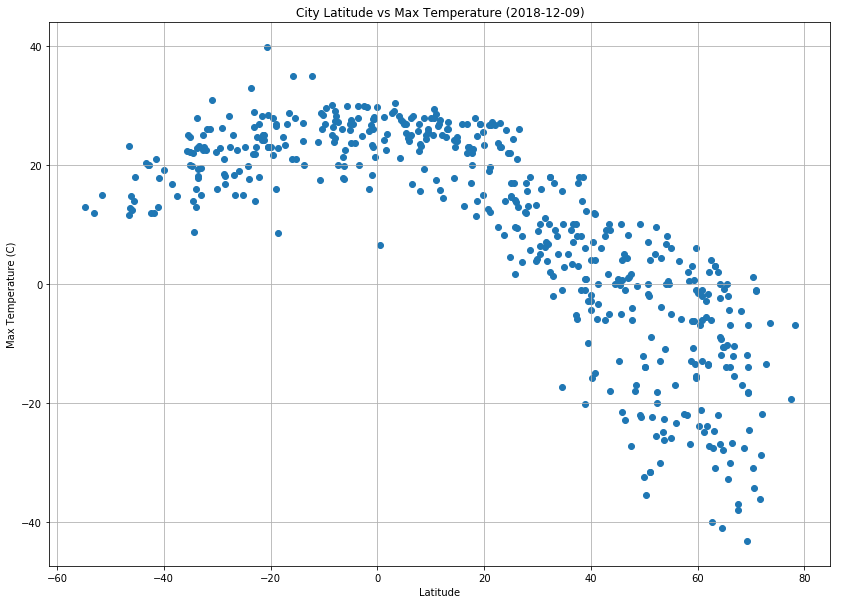

In [15]:
# Plot Latitude vs. Temperature
x = city_weather_df["API Latitude"]
y = city_weather_df["Max Temperature"]

plt.scatter(x, y)

title = "City Latitude vs Max Temperature (" + pullDate +")" 
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

plt.grid()

plt.gcf().set_size_inches(14, 10)

# Save the Figure
plt.savefig("output/LatitudeVsMaxTemperature_Alt.png")

# Show the Figure
plt.show()

#### Latitude vs. Humidity Plot

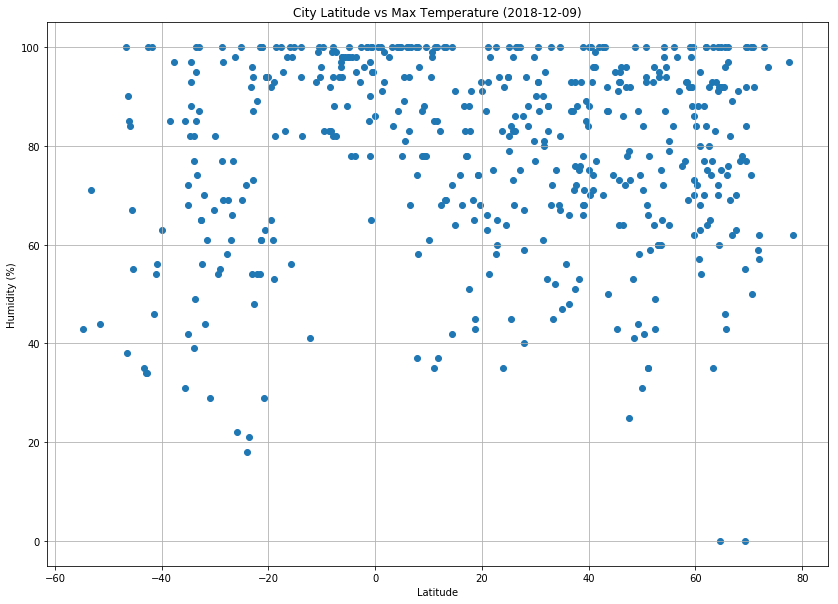

In [16]:
# Plot Latitude vs. Humidity
x = city_weather_df["API Latitude"]
y = city_weather_df["% Humidity"]

plt.scatter(x, y)

title = "City Latitude vs Max Temperature (" + pullDate +")" 
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid()

plt.gcf().set_size_inches(14, 10)

# Save the Figure
plt.savefig("output/LatitudeVsHumidity_Alt.png")

# Show the Figure
plt.show()

#### Latitude vs. Cloudiness Plot

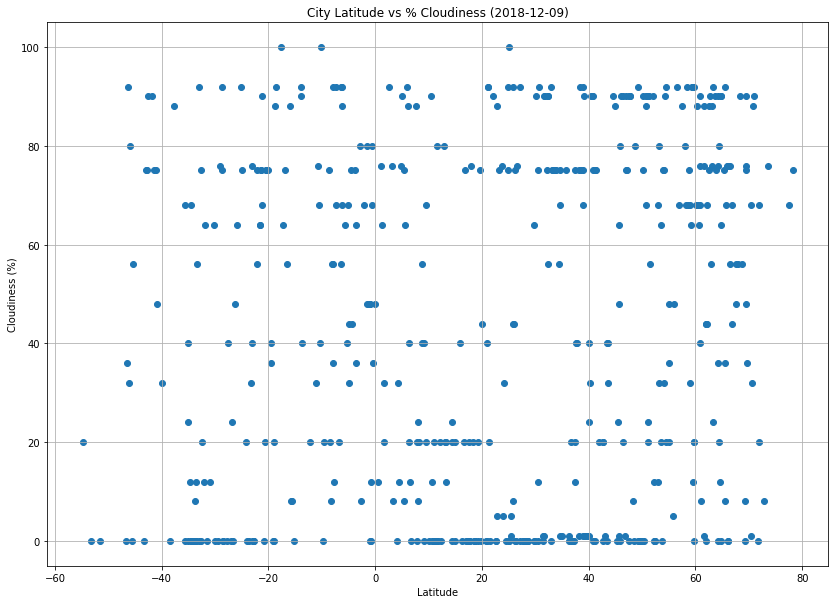

In [17]:
# Plot Latitude vs Cloudiness
x = city_weather_df["API Latitude"]
y = city_weather_df["% Cloudiness"]

plt.scatter(x, y)

title = "City Latitude vs % Cloudiness (" + pullDate +")" 
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid()

plt.gcf().set_size_inches(14, 10)

# Save the Figure
plt.savefig("output/LatitudeVsCloudiness_Alt.png")

# Show the Figure
plt.show()

#### Latitude vs. Wind Speed Plot

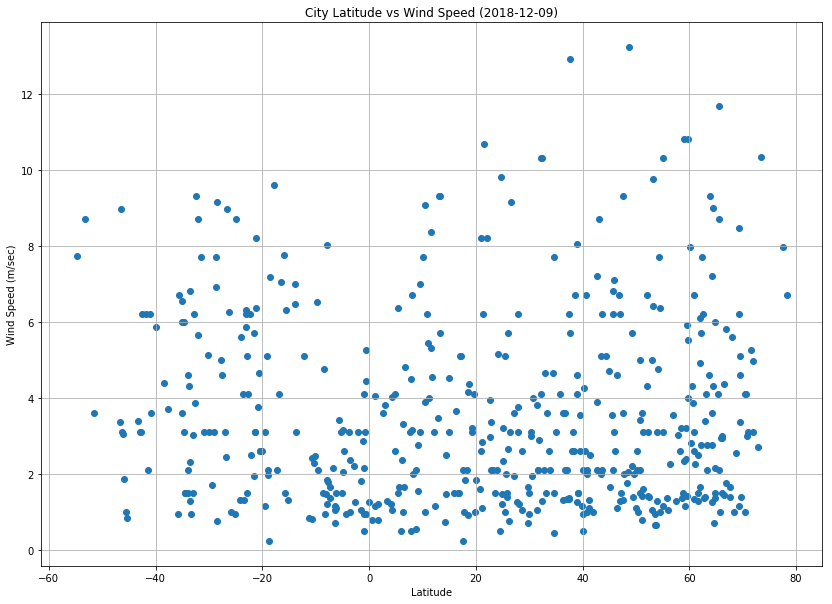

In [18]:
# Plot Latitude vs Wind Speed
x = city_weather_df["API Latitude"]
y = city_weather_df["Wind Speed"]

plt.scatter(x, y)

title = "City Latitude vs Wind Speed (" + pullDate +")" 
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/sec)")

plt.grid()

plt.gcf().set_size_inches(14, 10)

# Save the Figure
plt.savefig("output/LatitudeVsWindSpeed_Alt.png")

# Show the Figure
plt.show()

### Bonus Plots
Decided to add these plots because they are very interesting to visualize known phenomenon regarding daylight and latitude, and the randomization of geo coordinates.

#### Timezone Adjustment
Because the sunrise and sunset times from Weather API are provided in UTC time (based on the time in GMT timezone), the local time of the sunrise and sunset must be calculated by determining the timezone of the city from the longitudinal coordinate, and adjusting the times accordingly.

In [9]:
# Determine timezone adjustment

# Note:  The assumption is that the prime meridian (0 degrees ) is exactly in the middle of GMT time zone.  
#        Since each timezone is 15 degrees in width, therefore, the prime meridian goes from -7.5 degrees to 7.5 degrees.
#        All other timezones are then calculated by adding or subtracting 15 degrees from the GMT longitudinal boundary.
#        In actuality, time zones do not strictly follow longitudinal borders, (hence outliers seen in the graph)
#        but this also provides more ideal plotting.

# Provide the longitudinal edges of the timezones
bins = [-180, -172.5, -157.5, -142.5, -127.5, -112.5, -97.5, -82.5, -67.5, -52.5, -37.5, -22.5, -7.5, 7.5, 22.5, 37.5, 52.5,
        67.5, 82.5, 97.5, 112.5, 127.5, 142.5, 157.5, 172.5, 180]

# Provide the hour adjustment for the timezone bounded by the bin edges
hourAdjust = [-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Cut to determine the hour adjustment for each city
city_weather_df["Timezone"] = pd.cut(city_weather_df["API Longitude"], bins, labels = hourAdjust)
city_weather_df["Timezone"] = pd.to_numeric(city_weather_df["Timezone"])

# Adjust the Sunrise and Sunset times to be local times, and the convert so it is the number of seconds elapsed since midnight
#    and create new columns
city_weather_df["Adjusted Sunrise"] = (city_weather_df["Sunrise Time"] + (city_weather_df["Timezone"] *60*60)) % (24*60*60)
city_weather_df["Adjusted Sunset"] = (city_weather_df["Sunset Time"] + (city_weather_df["Timezone"] *60*60)) % (24*60*60)

# Determine duration of daylight in seconds that each city will experience for the day as a new column
city_weather_df["Daylight Time"] = city_weather_df["Adjusted Sunset"] - city_weather_df["Adjusted Sunrise"]

city_weather_df.head()

,Original City,Date,API City,API Country,API Longitude,API Latitude,Max Temperature,% Humidity,% Cloudiness,Wind Speed,Sunrise Time,Sunset Time,Timezone,Adjusted Sunrise,Adjusted Sunset,Daylight Time
0,ushuaia,1544403600,Ushuaia,AR,-68.31,-54.81,13.00,43,20,7.72,1544428241,1544490127,-5,10241,72127,61886
1,constitucion,1544402460,Constitucion,MX,-104.67,23.99,14.00,35,5,2.10,1544448654,1544487134,-7,23454,61934,38480
2,longyearbyen,1544403000,Longyearbyen,SJ,15.64,78.22,-7.00,62,75,6.70,0,0,1,3600,3600,0
3,bluff,1544404945,Bluff,NZ,168.33,-46.60,11.56,100,0,3.37,1544374038,1544430694,11,13638,70294,56656
4,owando,1544404946,Owando,CG,15.91,-0.49,21.41,95,36,0.97,1544417075,1544460822,1,20675,64422,43747


#### Latitude vs Duration of Daylight Plot

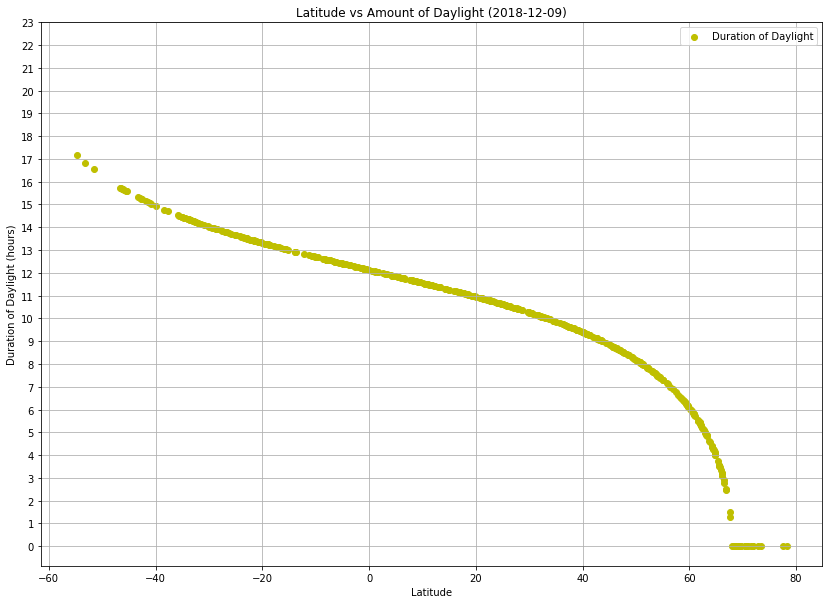

In [19]:
# Scatter plot of Latitude vs Duration of Daylight
x = city_weather_df["API Latitude"]
y = city_weather_df["Daylight Time"]

time_label = np.arange(0, 24)

plt.scatter(x, y, label="Duration of Daylight", color="y")

title = "Latitude vs Amount of Daylight (" + pullDate +")" 
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Duration of Daylight (hours)")
plt.legend(loc='best')

plt.yticks(np.arange(0, (24*60*60), (60*60)), time_label)

plt.grid()

plt.gcf().set_size_inches(14, 10)

# Save the Figure
plt.savefig("output/Bonus_LatitudeVsDurationOfDaylight_Alt.png")

# Show the Figure
plt.show()

#### Latitude vs Time of Sunrise / Sunset Plot

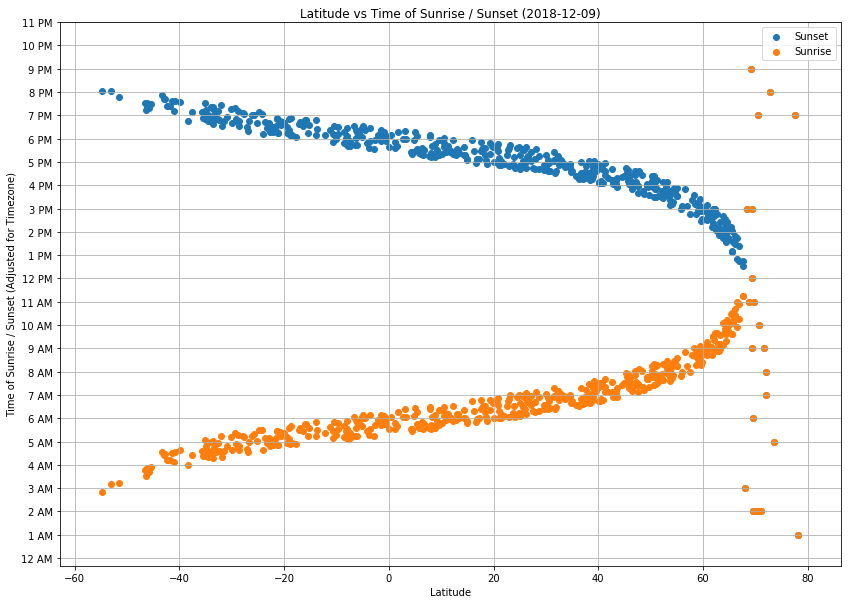

In [20]:
# Scatter plot of Latitude vs Time of Sunrise / Sunset

# Plot local Sunrise times
x1 = city_weather_df["API Latitude"]
y1 = city_weather_df["Adjusted Sunrise"]

# Plot local Sunset times
x2 = city_weather_df["API Latitude"]
y2 = city_weather_df["Adjusted Sunset"]

time_label = ["12 AM", "1 AM", "2 AM", "3 AM", "4 AM", "5 AM", "6 AM", "7 AM", "8 AM", "9 AM", "10 AM", "11 AM",
              "12 PM", "1 PM", "2 PM", "3 PM", "4 PM", "5 PM", "6 PM", "7 PM", "8 PM", "9 PM", "10 PM", "11 PM"]

plt.scatter(x2, y2, label="Sunset")
plt.scatter(x1, y1, label="Sunrise")

title = "Latitude vs Time of Sunrise / Sunset (" + pullDate +")" 
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Time of Sunrise / Sunset (Adjusted for Timezone)")
plt.legend(loc='best')

plt.yticks(np.arange(0, (24*60*60), (60*60)), time_label)

plt.grid()

plt.gcf().set_size_inches(14, 10)

# Save the Figure
plt.savefig("output/Bonus_LatitudeVsSunriseSunsetTime_Alt.png")

# Show the Figure
plt.show()

#### Geographic Coordinates of Cities Plot

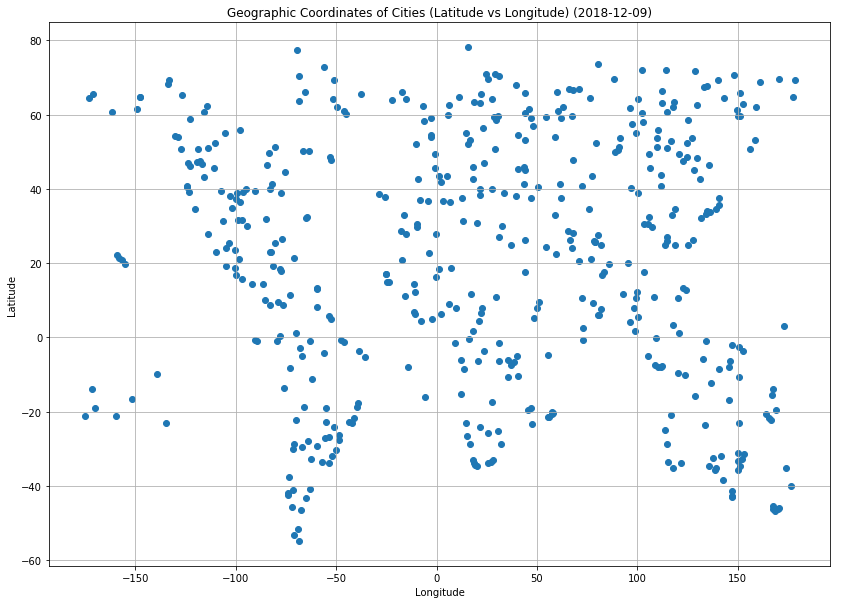

In [21]:
# Plot geographic coordinates of the cities
x = city_weather_df["API Longitude"]
y = city_weather_df["API Latitude"]

plt.scatter(x, y)

title = "Geographic Coordinates of Cities (Latitude vs Longitude) (" + pullDate +")" 
plt.title(title)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.grid()

plt.gcf().set_size_inches(14, 10)

# Save the Figure
plt.savefig("output/Bonus_CityGeographicCoordinates_Alt.png")

# Show the Figure
plt.show()

Note that because there is only 500 cities, the global map isn't as clearly defined as in the original "JTomines_WeatherPy" plot with 800+ cities